In [29]:
import torch, mrcfile
import matplotlib.pyplot as plt

In [30]:
#mw_lines = torch.ones_like(sample) * torch.where(torch.isclose(torch.abs(torch.atan(z/y)) , torch.Tensor([torch.pi/3]), atol = 1e-02), 1, 0)


In [31]:
sample = torch.Tensor(mrcfile.read("/Users/HenryJones/Desktop/emd_47152.map"))

In [32]:
print(sample.shape)

torch.Size([200, 1526, 1084])


In [33]:
z, y, x= torch.meshgrid(torch.linspace(-1 * sample.shape[0]/2, sample.shape[0]/2, steps = sample.shape[0]), 
                        torch.linspace(-1 * sample.shape[1]/2, sample.shape[1]/2, steps = sample.shape[1]),
                        torch.linspace(-1 * sample.shape[2]/2, sample.shape[2]/2, steps = sample.shape[2]))

/Users/HenryJones/miniconda3/envs/envupdate/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403212643/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [34]:
mw_mask = torch.ones_like(sample) * torch.where(torch.abs(torch.atan(z/y)) > (torch.pi/3), 1, 0)

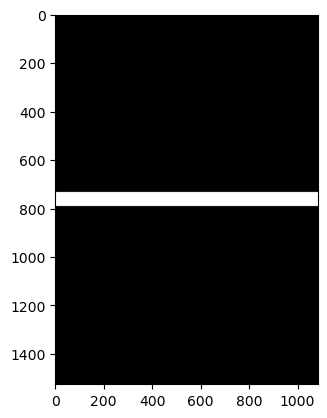

In [35]:
plt.imshow(mw_mask[150,:,:], cmap = "gray")

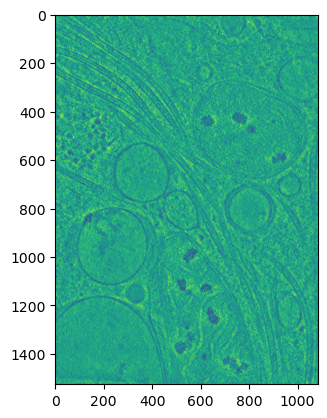

In [36]:
plt.imshow(sample[100, :,:])

In [37]:
plt.imshow(sample[:, 1526//2,:])

Error in callback <function flush_figures at 0x129ecf1a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [9]:
mw_slice = torch.abs(torch.fft.fft(sample[:,1526//2,:]))

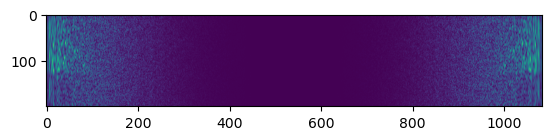

In [10]:
plt.imshow(mw_slice )

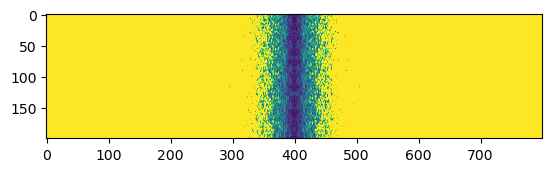

In [11]:
plt.imshow(mw_slice[:,1084//2 - 400: 1084//2 + 400], vmax = 0.01 )

In [12]:
second_slice = torch.abs(torch.fft.fft(sample[:,1526//2,1084 // 2 - 200: 1084 //2 + 200]))

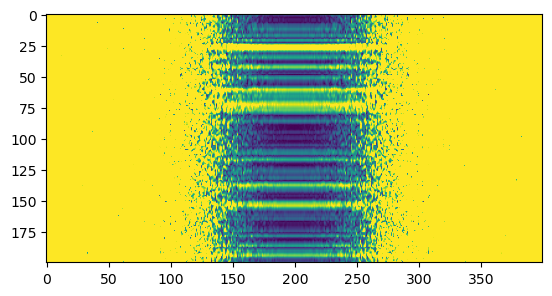

In [13]:
plt.imshow(second_slice, vmax = 0.1)

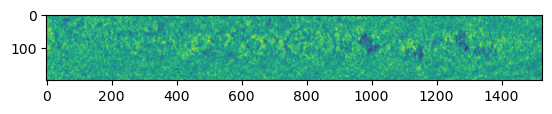

In [14]:
plt.imshow(sample[:, :,1084//2])

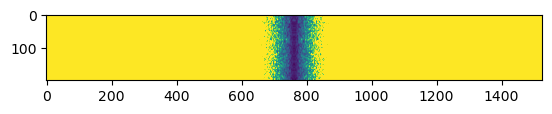

In [15]:
plt.imshow(torch.abs(torch.fft.fft(sample[:, :, 1084 //2])), vmax = 0.01)

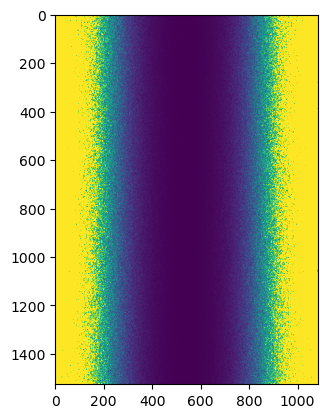

In [16]:
plt.imshow(torch.abs(torch.fft.fft(sample[100,:,:])), vmax = 2)

In [22]:
import make_mask_utils

In [23]:
mask = make_mask_utils.get_missing_wedge_mask(sample.shape, mw_angle=60)

In [46]:
angle = torch.deg2rad(torch.tensor(float(60)))

In [48]:
print(torch.tensor([torch.sin(angle), torch.cos(angle)]))
print(torch.tensor([torch.sin(angle), -torch.cos(angle)]))

tensor([0.8660, 0.5000])
tensor([ 0.8660, -0.5000])


In [45]:
import numpy as np
print(np.pi/3)

1.0471975511965976


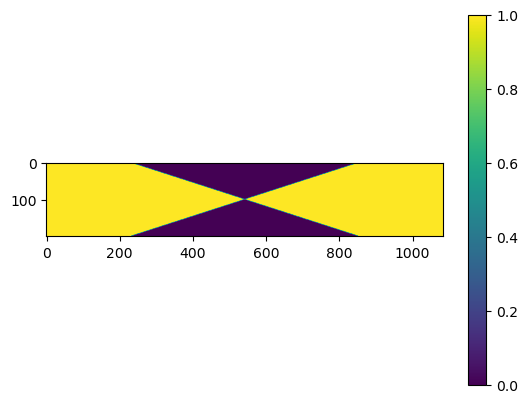

In [28]:
plt.imshow(mask[:, 1526 //2, :])
plt.colorbar()

In [30]:
torch.save(mask, "./rmbmask.pt")

In [31]:
torch.save(sample, "./emb_sample.pt")

In [3]:
import numpy as np
import torch

In [8]:
a = np.arange(8).reshape((2,2,2))
b = torch.arange(8).reshape((2,2,2))

In [21]:
print(b.size())

torch.Size([2, 2, 2])


In [23]:
print(np.tile(a, [1, 2, 2]))
print(torch.tile(b, (1,2,2)))
print('here')
print(b.expand(-1, -1, 2))
print('nowhere')
print(b)

[[[0 1 0 1]
  [2 3 2 3]
  [0 1 0 1]
  [2 3 2 3]]

 [[4 5 4 5]
  [6 7 6 7]
  [4 5 4 5]
  [6 7 6 7]]]
tensor([[[0, 1, 0, 1],
         [2, 3, 2, 3],
         [0, 1, 0, 1],
         [2, 3, 2, 3]],

        [[4, 5, 4, 5],
         [6, 7, 6, 7],
         [4, 5, 4, 5],
         [6, 7, 6, 7]]])
here
tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])
nowhere
tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])


In [20]:
x = torch.tensor([[1], [2], [3]])
print(x.size())
print(x.expand(3,4))
print(x.expand(-1, 4))

torch.Size([3, 1])
tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])


In [24]:
this = torch.load("./mwr.pt")

In [41]:
sample = torch.load("./emb_sample.pt")

In [42]:
print(sample.shape)

torch.Size([200, 1526, 1084])


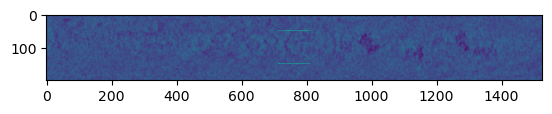

In [75]:
inset = torch.zeros_like(sample[:,:, sample.shape[2]//2])
inset[(inset.shape[0] // 2) - 50, (inset.shape[1] // 2) - 50: (inset.shape[1] // 2) + 50] = 1
inset[(inset.shape[0] // 2) + 50, (inset.shape[1] // 2) - 50: (inset.shape[1] // 2) + 50] = 1

plt.imshow(sample[:, :, sample.shape[2]//2] + inset)

In [38]:
print(this.shape)

torch.Size([100, 100, 100])


In [39]:
print(torch.max(this), torch.min(this))

tensor(0.) tensor(0.)


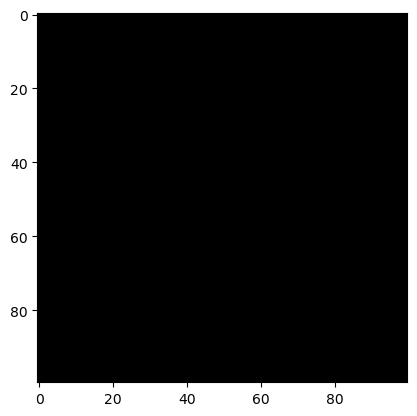

In [28]:
import matplotlib.pyplot as plt
plt.imshow(this[50,:,:], cmap = "gray")

In [50]:
import torch
import numpy as np

In [54]:
print((0.1 * (3/(4*np.pi)))**(1/3))

0.2879411911484861


In [58]:
size = torch.tensor([200, 1000, 2000])
z, y, x = torch.meshgrid([torch.fft.rfftfreq(size[0]),
                          torch.fft.rfftfreq(size[1]),
                          torch.fft.rfftfreq(size[2])])

mask = torch.zeros((101, 501, 1001))
mask[torch.sqrt(z**2 + y**2 + x**2) < torch.tensor([0.2879411911484861])] = 1

In [84]:
print(torch.fft.fftshift(torch.fft.fftfreq(6)))
print(torch.fft.ifftshift(torch.fft.fftfreq(6)))

tensor([-0.5000, -0.3333, -0.1667,  0.0000,  0.1667,  0.3333])
tensor([-0.5000, -0.3333, -0.1667,  0.0000,  0.1667,  0.3333])


In [77]:
print(torch.sum(mask) / torch.prod(torch.tensor([101, 501, 1001])))

tensor(0.1004)


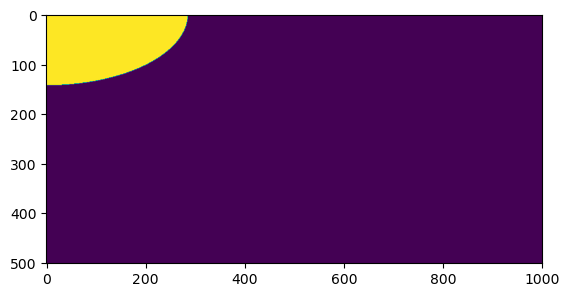

In [62]:
plt.imshow(mask[50, :, :])

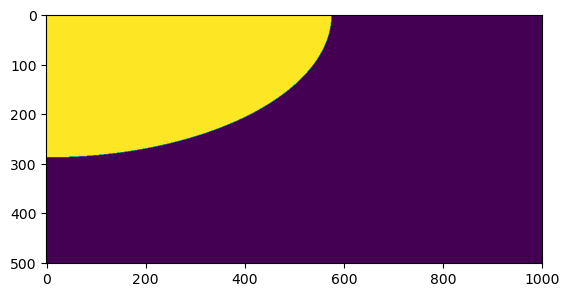

In [65]:
plt.imshow(mask[0, :, :])

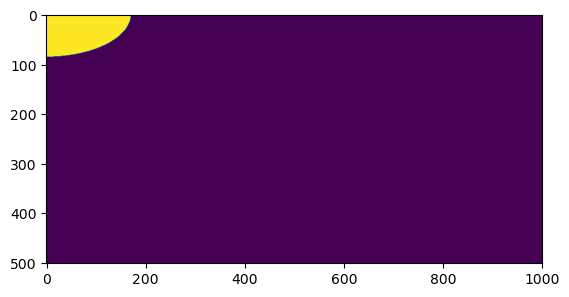

In [70]:
plt.imshow(mask[55, :, :])

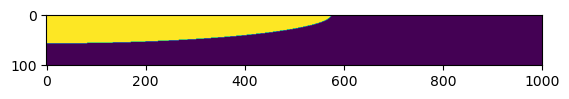

In [72]:
plt.imshow(mask[:, 0, :])

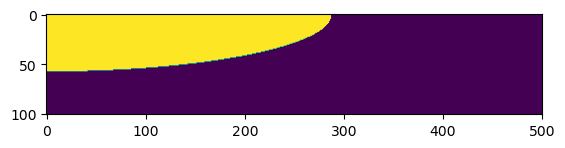

In [73]:
plt.imshow(mask[:, :, 0])

In [85]:
size = torch.tensor([200, 1000, 2000])
z, y, x = torch.meshgrid([torch.fft.fftfreq(size[0]),
                          torch.fft.fftfreq(size[1]),
                          torch.fft.rfftfreq(size[2])])

mask = torch.zeros_like(z)
mask[torch.sqrt(z**2 + y**2 + x**2) < torch.tensor([0.2879411911484861])] = 1

In [86]:
print(mask.shape)

torch.Size([200, 1000, 1001])


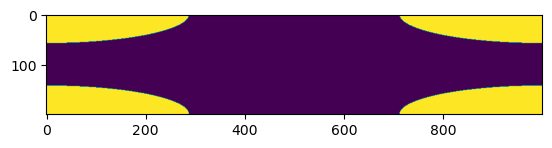

In [87]:
plt.imshow(mask[:,:, 0])

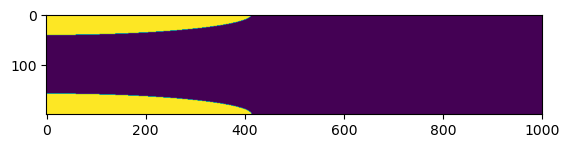

In [92]:
plt.imshow(mask[:,200,:])

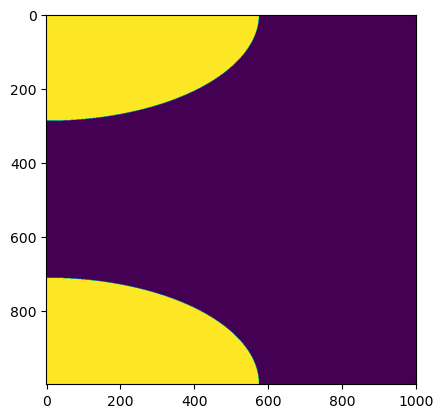

In [93]:
plt.imshow(mask[0,:,:])

In [94]:
inverse = torch.fft.ifftshift(mask)

In [96]:
print(inverse.shape)

torch.Size([200, 1000, 1001])


In [98]:
print(sample.shape)

torch.Size([200, 1526, 1084])


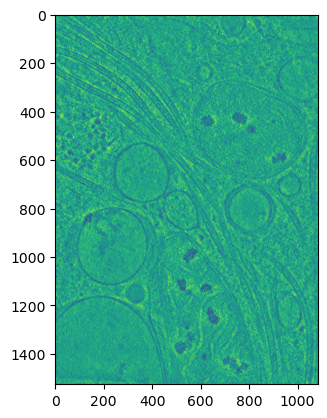

In [99]:
plt.imshow(sample[100,:,:])

In [110]:
print(torch.fft.fftfreq(sample[100,:,:].shape[0])[::50])
print(torch.abs(torch.fft.rfftfreq(sample[100,:,:].shape[1]))[::50])

tensor([ 0.0000,  0.0328,  0.0655,  0.0983,  0.1311,  0.1638,  0.1966,  0.2294,
         0.2621,  0.2949,  0.3277,  0.3604,  0.3932,  0.4260,  0.4587,  0.4915,
        -0.4758, -0.4430, -0.4102, -0.3775, -0.3447, -0.3119, -0.2792, -0.2464,
        -0.2136, -0.1809, -0.1481, -0.1153, -0.0826, -0.0498, -0.0170])
tensor([0.0000, 0.0461, 0.0923, 0.1384, 0.1845, 0.2306, 0.2768, 0.3229, 0.3690,
        0.4151, 0.4613])


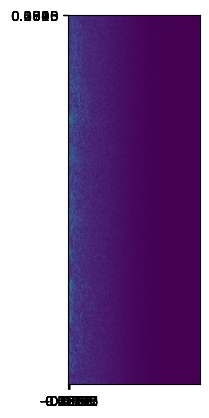

In [116]:
plt.imshow(torch.abs(torch.fft.rfft(sample[100,:,:])),)
plt.gca().set_xticks(torch.fft.fftfreq(sample[100,:,:].shape[0])[::100])
plt.gca().set_yticks(torch.fft.rfftfreq(sample[100,:,:].shape[1])[::100])

In [1]:
import torch
unflattened= torch.complex(torch.linspace(0, 10, 60).reshape((3,4,5)),
                           torch.linspace(0,10,60).reshape((3,4,5)))
print((unflattened / torch.norm(unflattened)).shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
torch.Size([3, 4, 5])


In [22]:
toyex = torch.fft.rfft(torch.arange(5, dtype = torch.float32)**2 + 10)
toyex1 = toyex.unsqueeze(-1)
print(torch.norm(toyex1, dim = 1))
print(toyex)
toyex2 = torch.fft.rfft(torch.arange(5, dtype = torch.float32))
toyex21 = toyex2.unsqueeze(-1)
print(torch.norm(toyex21, dim = 1))
print(torch.sum(toyex1 * toyex21, dim = 1))
print(toyex1, toyex21)
print(toyex1 * toyex21)
vector = torch.sum(toyex1 * torch.conj(toyex21), dim = 1) / (torch.norm(toyex21, dim = 1) * torch.norm(toyex1, dim = 1))
print(vector, "cc")
print(torch.real(vector), "mag of cc")
print(torch.abs(toyex[0]))
print(torch.norm(toyex1, dim = 1))




tensor([80.0000, 17.9920, 10.5493])
tensor([80.0000+0.0000j, -5.2639+17.2048j, -9.7361+4.0615j])
tensor([10.0000,  4.2533,  2.6287])
tensor([800.0000+0.0000j, -46.0410-61.1249j,  21.0410-18.0623j])
tensor([[80.0000+0.0000j],
        [-5.2639+17.2048j],
        [-9.7361+4.0615j]]) tensor([[10.0000+0.0000j],
        [-2.5000+3.4410j],
        [-2.5000+0.8123j]])
tensor([[800.0000+0.0000j],
        [-46.0410-61.1249j],
        [ 21.0410-18.0623j]])
tensor([1.0000+0.0000j, 0.9456-0.3254j, 0.9967-0.0810j]) cc
tensor([1.0000, 0.9456, 0.9967]) mag of cc
tensor(80.)
tensor([80.0000, 17.9920, 10.5493])


In [19]:
print(torch.dot(toyex, torch.conj(toyex2))/ (torch.linalg.norm(toyex) * torch.linalg.norm(toyex2)))

tensor(0.9737-0.0294j)


In [122]:
flattened = torch.flatten(unflattened)
torch.all(torch.reshape(flattened, unflattened.shape) == unflattened)

tensor(True)

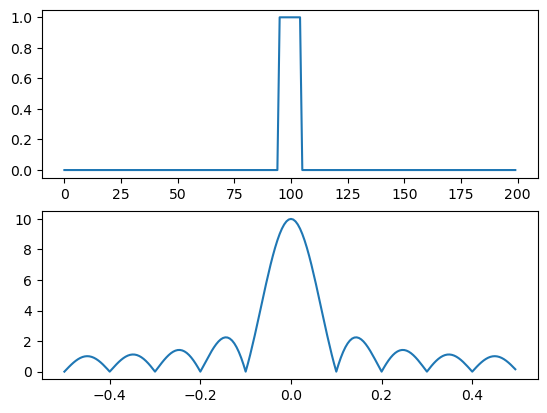

In [146]:
line = torch.zeros(200)
line[95:105] = 1
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].plot(line)
ax[1].plot(torch.fft.fftshift(torch.fft.fftfreq(200)), torch.abs(torch.fft.fftshift(torch.fft.fft(line))))

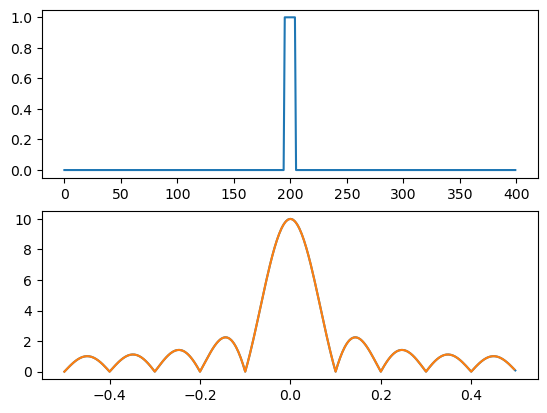

: 

In [150]:
linel = torch.zeros(400)
linel[195:205] = 1
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].plot(linel)
ax[1].plot(torch.fft.fftshift(torch.fft.fftfreq(400)), torch.abs(torch.fft.fftshift(torch.fft.fft(linel))))
ax[1].plot(torch.fft.fftshift(torch.fft.fftfreq(200)), torch.abs(torch.fft.fftshift(torch.fft.fft(line))))